Import the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  preprocessing
from sklearn.model_selection import train_test_split



In [6]:
iris=pd.read_csv('/content/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Data Analysis**

In [8]:
#iris.shape
iris.shape

(150, 6)

In [11]:
iris['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [12]:
#info about the data set
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**SEPERATION INTO X AND Y AXIS**

In [14]:
x=iris.iloc[:,:4]
y=iris.iloc[:,-1]

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


**Data Normalization**

In [16]:
x=preprocessing.StandardScaler().fit_transform(x)
x

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 ],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 ],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 ],
       [-1.62816394, -1.02184904,  1.26346019, -1.3412724 ],
       [-1.60506942, -0.53717756,  1.95766909, -1.17067529],
       [-1.58197489, -1.50652052,  0.80065426, -1.3412724 ],
       [-1.55888037, -1.02184904,  0.80065426, -1.2844067 ],
       [-1.53578584, -1.74885626, -0.35636057, -1.3412724 ],
       [-1.51269132, -1.14301691,  0.10644536, -1.2844067 ],
       [-1.4895968 , -0.53717756,  1.49486315, -1.2844067 ],
       [-1.46650227, -1.26418478,  0.80065426, -1.227541  ],
       [-1.44340775, -1.26418478, -0.1249576 , -1.3412724 ],
       [-1.42031323, -1.87002413, -0.1249576 , -1.51186952],
       [-1.3972187 , -0.05250608,  2.18907205, -1.45500381],
       [-1.37412418, -0.17367395,  3.11468391, -1.2844067 ],
       [-1.35102965, -0.

**Train Test Split using KNN Model**

In [17]:
#80% for training and 20% for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape


(120, 4)

In [18]:
x_test.shape

(30, 4)

**Data Model And Predicting**


In [19]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
#we have fit the values of x and y into the knn model, now use this model to predict the x_test values
y_predict=knnmodel.predict(x_test)

**Accuracy Score**'


In [21]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict)
acc

0.9666666666666667

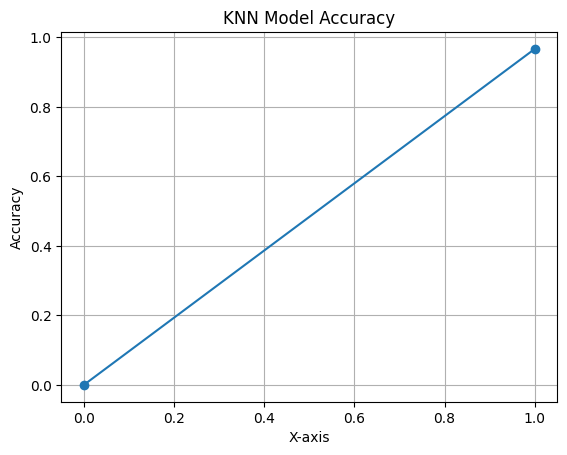

In [25]:
plt.plot([0, 1], [0, acc], marker='o')
plt.title('KNN Model Accuracy')
plt.xlabel('X-axis')
plt.ylabel('Accuracy')
plt.grid()
plt.show()